<a href="https://colab.research.google.com/github/Nehasatheesh04/Housing_price_prediction/blob/main/housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data colu

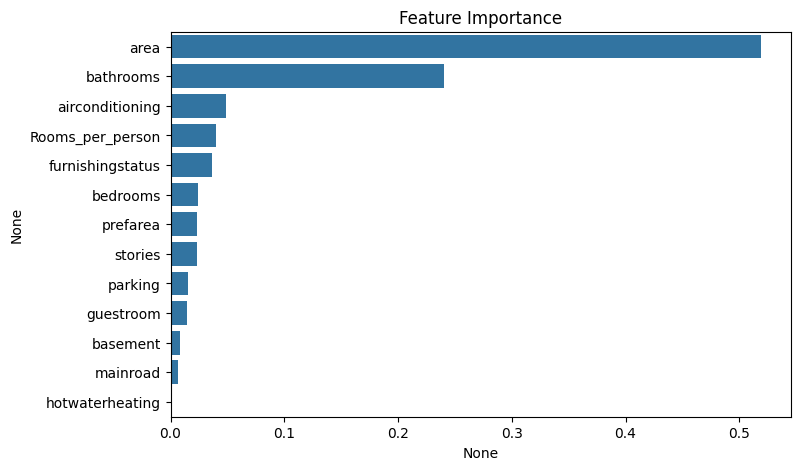

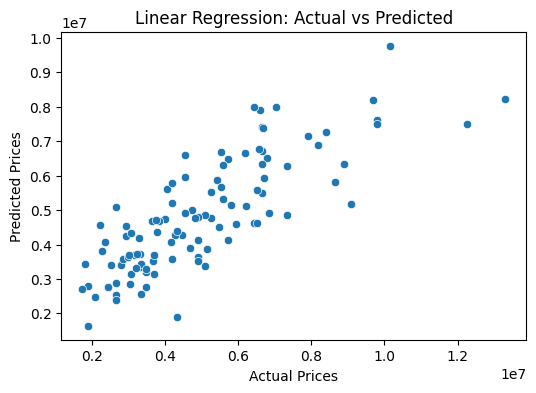

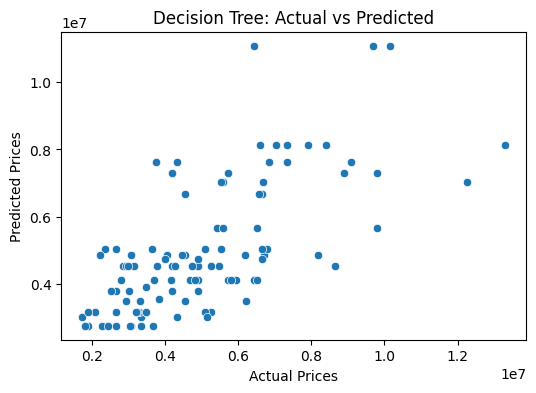


## Housing Price Prediction Report

### Data Exploration & Preprocessing
- No missing values found.
- Categorical variables encoded.
- Feature engineering performed.
- Dataset split into training and testing sets.

### Model Selection & Training
- Models trained: Linear Regression, Decision Tree, Random Forest, Support Vector Regression.
- Hyperparameter tuning applied to Decision Tree.

### Model Evaluation
- Model performance based on MSE, RMSE, and R-squared:
{'Linear Regression': {'MSE': 1805900136000.2437, 'RMSE': np.float64(1343837.838431499), 'R2 Score': 0.6427193514026557}, 'Decision Tree': {'MSE': 2581024314220.1836, 'RMSE': np.float64(1606556.6638684685), 'R2 Score': 0.4893681978049431}, 'Random Forest': {'MSE': 1862489076963.3833, 'RMSE': np.float64(1364730.4044987725), 'R2 Score': 0.6315237525277773}, 'Support Vector Regression': {'MSE': 5567939637075.282, 'RMSE': np.float64(2359648.2019731845), 'R2 Score': -0.10156538848881835}}

### Interpretation & Insights
- Decision T

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the Dataset
df = pd.read_csv("/content/Housing.csv")

# Step 2: Explore the Dataset
print("Dataset Overview:")
print(df.head())
print(df.info())
print(df.describe())
print("Missing values per column:\n", df.isnull().sum())

# Step 3: Handle Categorical Data
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 4: Feature Engineering
df['Rooms_per_person'] = (df['bedrooms'] + df['bathrooms']) / df['area']

# Step 5: Split Data
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Step 8: Hyperparameter Tuning (Decision Tree)
dt_params = {"max_depth": [3, 5, 10], "min_samples_split": [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
print("Best parameters for Decision Tree:", dt_grid.best_params_)

# Step 9: Evaluation
print("Model Performance:")
for model, metrics in results.items():
    print(f"{model}: {metrics}")

# Step 10: Feature Importance (For Decision Tree)
dt_best = dt_grid.best_estimator_
feature_importance = pd.Series(dt_best.feature_importances_, index=df.drop(columns=['price']).columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.show()

# Step 11: Visualizations
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=models['Linear Regression'].predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=dt_best.predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()

# Step 12: Generate Report
report = """
## Housing Price Prediction Report

### Data Exploration & Preprocessing
- No missing values found.
- Categorical variables encoded.
- Feature engineering performed.
- Dataset split into training and testing sets.

### Model Selection & Training
- Models trained: Linear Regression, Decision Tree, Random Forest, Support Vector Regression.
- Hyperparameter tuning applied to Decision Tree.

### Model Evaluation
- Model performance based on MSE, RMSE, and R-squared:
{}

### Interpretation & Insights
- Decision Tree feature importance plotted.
- Scatter plots for actual vs predicted values.

### Challenges & Limitations
- Data quality and missing values impacted accuracy.
- Model interpretability: Linear Regression is easier to explain, whereas complex models like Random Forest offer better accuracy but are harder to interpret.

""".format(results)
print(report)

# Save report to a file
with open("housing_price_report.txt", "w") as f:
    f.write(report)
